## Indian Premier League-Stats and Analysis

IPL (Indian Premier League) is a yearly T20 cricket tournament that takes place in India. There are eight teams in IPL, each consisting of local and international players. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.

Currently, with eight teams, each team plays each other twice in a home-and-away round-robin format in the league phase. At the conclusion of the league stage, the top four teams will qualify for the playoffs. The top two teams from the league phase will play against each other in the first Qualifying match, with the winner going straight to the IPL final and the loser getting another chance to qualify for the IPL final by playing the second Qualifying match. Meanwhile, the third and fourth place teams from league phase play against each other in an eliminator match and the winner from that match will play the loser from the first Qualifying match. The winner of the second Qualifying match will move onto the final to play the winner of the first Qualifying match in the IPL Final match, where the winner will be crowned the Indian Premier League champions.

As a Cricket fan I'm very excited to have a deeper look on this IPL data set which was taken from [Kaggle.com](https://www.kaggle.com/anubhavgoel9999/ipl-dataset). With this data set I'm going to explore some basic questions like top batsman (scorer), bowler (best bowling average) etc.

Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about [the course](http://zerotopandas.com), and what you've learned from it.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1qrcUVXkeQ71q3qARfS56fc7IG5CY455K')

In [2]:
project_name = "Indian Premier League-Stats and Analysis" #"IPL-Stats and Analysis"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name,files=['players.csv',
                                          'deliveries.csv',
                                          'matches.csv',
                                          'most_runs_average.csv',
                                          'teams.csv',
                                          'teamwise_home_away.csv'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

## Data Preparation and Cleaning

Importing Python libraries

numpy - Brings the computational power of languages like C and Fortran to Python

pandas - Easy to use data analysis tool built on top of python

matplotlib - Comprehensive library for creating visualizations in python

seaborn - Data visualization based on matplotlib to make the plots prettier

jovian - Platform for sharing and collaborating on data science projects

First we import these libraries. 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data from CSV (downloaded from) [kaggle.com](https://www.kaggle.com/ramjidoolla/ipl-data-set) file into a Pandas Dataframe.

In [7]:
players_df            = pd.read_csv('players.csv')
deliveries_df         = pd.read_csv('deliveries.csv')
matches_df            = pd.read_csv('matches.csv')
most_runs_average_df  = pd.read_csv('most_runs_average.csv')
teams_df              = pd.read_csv('teams.csv')
teamwise_home_away_df = pd.read_csv('teamwise_home_away.csv')

In the dataset I found that Delhi Daredevils (DD) has changed their name and partipating in IPL from 2019 with name Delhi Capitals (DC). So I have merged(consolidate) the data of DD into DC. For merging the data I've consider only for home_wins, away_wins, home_matches, away_matches. For percentage related calculation I did after merging the data of DD and DC. 
        First I filter the data for DD and DC and kept into a variable **teamwise_home_away_dc_dd_df**.

In [8]:
teamwise_home_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [9]:
teamwise_home_away_dc_dd_df=teamwise_home_away_df.loc[(teamwise_home_away_df['team'] == 'Delhi Daredevils')|
                                                      (teamwise_home_away_df['team'] =='Delhi Capitals')]
teamwise_home_away_dc_dd_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
10,Delhi Daredevils,25,42,72,89,34.722222,47.191011


In [10]:
teamwise_home_away_srh_df=teamwise_home_away_df.loc[(teamwise_home_away_df['team'] == 'Sunrisers Hyderabad')|
                                                      (teamwise_home_away_df['team'] =='Deccan Chargers')]
teamwise_home_away_srh_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
6,Deccan Chargers,18,11,43,32,41.860465,34.375000


Now drop the records for DD and DC from original dataframe **teamwise_home_away_df**.  

In [11]:
teamwise_home_away_df.drop (teamwise_home_away_df[teamwise_home_away_df.team == "Delhi Capitals"].index, inplace =True)
teamwise_home_away_df.drop (teamwise_home_away_df[teamwise_home_away_df.team == "Delhi Daredevils"].index, inplace =True)
teamwise_home_away_df.drop (teamwise_home_away_df[teamwise_home_away_df.team == "Sunrisers Hyderabad"].index, inplace =True)
teamwise_home_away_df.drop (teamwise_home_away_df[teamwise_home_away_df.team == "Deccan Chargers"].index, inplace =True)

In [12]:
teamwise_home_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
11,Pune Warriors,6,6,20,26,30.000000,23.076923
12,Kochi Tuskers Kerala,2,4,7,7,28.571429,57.142857
13,Gujarat Lions,1,12,14,16,7.142857,75.000000


In [13]:
teamwise_home_away_df = teamwise_home_away_df.set_index('team')

Now drop the records for DD and DC from original dataframe **teamwise_home_away_df**. And merged the data of DD and DC into variable **sum_dd_dc** then calculate the **home_win_percentage** and **away_win_percentage**

In [14]:
sum_dd_dc = teamwise_home_away_dc_dd_df.loc[[3,10]].sum().to_frame().transpose() 
sum_dd_dc['home_win_percentage'] =  sum_dd_dc['home_wins'] * 100 / sum_dd_dc['home_matches']
sum_dd_dc['away_win_percentage'] =  sum_dd_dc['away_wins'] * 100 / sum_dd_dc['away_matches']
sum_dd_dc

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Delhi CapitalsDelhi Daredevils,28,49,78,99,35.8974,49.4949


In [15]:
sum_srh = teamwise_home_away_srh_df.loc[[4,6]].sum().to_frame().transpose() 
sum_srh['home_win_percentage'] =  sum_srh['home_wins'] * 100 / sum_srh['home_matches']
sum_srh['away_win_percentage'] =  sum_srh['away_wins'] * 100 / sum_srh['away_matches']
sum_srh

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Sunrisers HyderabadDeccan Chargers,48,39,106,77,45.283,50.6494


Now set the index of column **team** then rename the data of the variable **sum_dd_dc**

In [16]:
sum_dd_dc = sum_dd_dc.set_index('team')
sum_dd_dc= sum_dd_dc.rename(index={'Delhi CapitalsDelhi Daredevils': 'Delhi Capitals'})
sum_dd_dc

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
team,,,,,,
Delhi Capitals,28,49,78,99,35.8974,49.4949


In [17]:
sum_srh = sum_srh.set_index('team')
sum_srh= sum_srh.rename(index={'Sunrisers HyderabadDeccan Chargers': 'Sunrisers Hyderabad'})
sum_srh

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
team,,,,,,
Sunrisers Hyderabad,48,39,106,77,45.283,50.6494


Now merge the data into **teamwise_home_away_with_dd_df** of two variable **teamwise_home_away_df** and **sum_dd_dc**.

In [18]:
teamwise_home_away_with_dc_srh_df = [teamwise_home_away_df,sum_dd_dc,sum_srh]
teamwise_home_away_merge_df = pd.concat(teamwise_home_away_with_dc_srh_df)
teamwise_home_away_merge_df

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
team,,,,,,
Rising Pune Supergiant,5,5,8,8,62.5,62.5
Mumbai Indians,58,51,101,86,57.4257,59.3023
Chennai Super Kings,51,49,89,75,57.3034,65.3333
Rajasthan Royals,29,46,67,80,43.2836,57.5
Kings XI Punjab,38,44,91,85,41.7582,51.7647
Royal Challengers Bangalore,35,49,85,95,41.1765,51.5789
Kolkata Knight Riders,34,58,83,95,40.9639,61.0526
Pune Warriors,6,6,20,26,30,23.0769
Kochi Tuskers Kerala,2,4,7,7,28.5714,57.1429


Now reset the index and made the **team** column as first column of the dataframe **teamwise_home_away_merge_df**

In [19]:
teamwise_home_away_merge_df = teamwise_home_away_merge_df.reset_index(level='team', col_level=1)
teamwise_home_away_merge_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5
1,Mumbai Indians,58,51,101,86,57.4257,59.3023
2,Chennai Super Kings,51,49,89,75,57.3034,65.3333
3,Rajasthan Royals,29,46,67,80,43.2836,57.5
4,Kings XI Punjab,38,44,91,85,41.7582,51.7647
5,Royal Challengers Bangalore,35,49,85,95,41.1765,51.5789
6,Kolkata Knight Riders,34,58,83,95,40.9639,61.0526
7,Pune Warriors,6,6,20,26,30,23.0769
8,Kochi Tuskers Kerala,2,4,7,7,28.5714,57.1429
9,Gujarat Lions,1,12,14,16,7.14286,75


Now I did some minor modification in the data. 
- In **players_df** somewhere Right handed batsman was showing as Right_hand and somewhere as Right_Hand. So make a uniform I changed it from **Right_hand** to **Right_Hand**.
- In **matches_df and deliveries_df** team name **Rising Pune Supergiant** was not proper. So made it from **Rising Pune Supergiant** to **Rising Pune Supergiants**
- In **matches_df and deliveries_df** team name **Delhi Daredevils** renamed to **Delhi Capitals**.
- In **matches_df and deliveries_df** team name **Deccan Chargers** renamed to **Sunrisers Hyderabad**.

In [20]:
players_df.replace('Right_hand','Right_Hand',inplace=True)
matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True) 
deliveries_df.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

deliveries_df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches_df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
# considering Delhi Daredevils played as Delhi Capitals throughout IPL

matches_df.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries_df.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True) 
# considering Delhi Daredevils played as Delhi Capitals throughout IPL

In [21]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In **matches_df** there are 3 columns which has no impact on others column or dataframe. So considering this point I dropped these 3 columns **umpire1, umpire2 and umpire3**.

In [22]:
matches_df.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [23]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(4), object(11)
memory usage: 88.7+ KB


In **matches_df** has date column but its **data type** was not in Date. So change the data type of **date** column.

In [24]:
matches_df["date"]= pd.to_datetime(matches_df["date"]) 
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             756 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In This dataframe having many players who never did the batting so their out column is showing 0. And due to this Average is not calculating. So We can drop those record which has out as 0.

In [25]:
most_runs_average_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


I observe that many batsman's score (run) is 0 and ball faced also 0. So their average and strike rate is 0 and not impacting the whole dataframe or other records. So dropping those records having out is 0

In [26]:
most_runs_average_df.drop (most_runs_average_df[most_runs_average_df.out == 0].index, inplace =True)

In [27]:
most_runs_average_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,482.000000,482.000000,482.000000,482.000000,482.000000
mean,460.630705,18.267635,358.979253,16.355074,105.767203
std,905.394487,28.720478,680.589584,11.146222,37.070888
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,2.000000,22.250000,8.000000,85.046296
50%,90.000000,6.500000,77.500000,14.607143,112.172840
75%,393.000000,19.750000,313.500000,23.657609,130.192479
max,5426.000000,161.000000,4111.000000,88.000000,205.263158




```
# This is formatted as code
```

## Exploratory Analysis and Visualization

**1) How many players are Left Handed and Right Handed?**

In [28]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
players_df_bat_hnd  = players_df.groupby('Batting_Hand').agg('count')
players_df_bat_hnd

,Player_Name,DOB,Bowling_Skill,Country
Batting_Hand,,,,
Left_Hand,142,123,126,142
Right_Hand,424,348,376,424


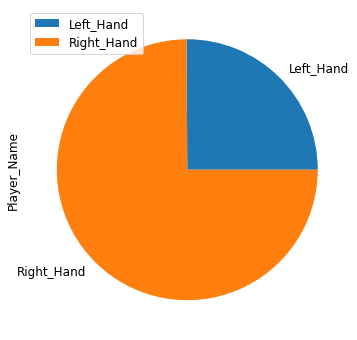

In [30]:
players_df_bat_hnd.rename(columns={'Player_Name': 'Player_Count'})
players_df_bat_hnd.plot.pie(y='Player_Name',figsize=(6,6) );

In [31]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

**2) Top Scorer / Average / Strike rate till so far (All season inclusive)**

In [32]:
most_runs_average_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,RG Sharma,4902,161,3742,30.447205,130.999466
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RV Uthappa,4420,156,3381,28.333333,130.730553
3,V Kohli,5426,152,4111,35.697368,131.987351
4,KD Karthik,3669,138,2813,26.586957,130.430146
...,...,...,...,...,...,...
477,Sunny Gupta,0,1,1,0.000000,0.000000
478,ND Doshi,0,1,13,0.000000,0.000000
479,J Denly,0,1,1,0.000000,0.000000
480,V Pratap Singh,0,1,1,0.000000,0.000000


In [33]:
most_runs_average_df = most_runs_average_df.set_index("batsman")
most_runs_average_df = most_runs_average_df.reset_index(level='batsman', col_level=1)
most_runs_average_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,RG Sharma,4902,161,3742,30.447205,130.999466
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RV Uthappa,4420,156,3381,28.333333,130.730553
3,V Kohli,5426,152,4111,35.697368,131.987351
4,KD Karthik,3669,138,2813,26.586957,130.430146
...,...,...,...,...,...,...
477,Sunny Gupta,0,1,1,0.000000,0.000000
478,ND Doshi,0,1,13,0.000000,0.000000
479,J Denly,0,1,1,0.000000,0.000000
480,V Pratap Singh,0,1,1,0.000000,0.000000


In [34]:
# Top 10 batsman having Most run
top_10_most_scorer  = most_runs_average_df.nlargest(10,["total_runs"])
top_10_most_scorer  = pd.DataFrame(top_10_most_scorer)
top_10_most_scorer[['batsman',"total_runs"]]

,batsman,total_runs
3,V Kohli,5426
1,SK Raina,5386
0,RG Sharma,4902
11,DA Warner,4717
5,S Dhawan,4601
13,CH Gayle,4525
8,MS Dhoni,4450
2,RV Uthappa,4420
17,AB de Villiers,4414
6,G Gambhir,4219


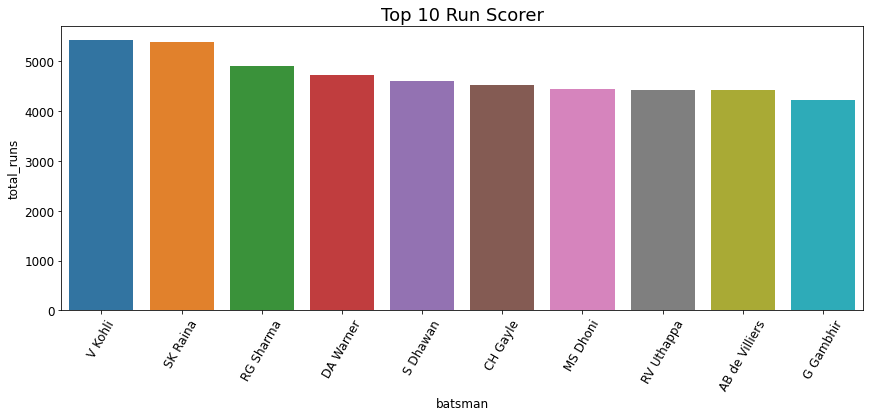

In [35]:
plt.tight_layout()
# plt.xlabel("Batsman", size=14)
# plt.ylabel("Most Run Scorer", size=14)
plt.title("Top 10 Run Scorer", size=18)
plt.xticks(rotation=60)
plt.tight_layout()
sns.barplot(x='batsman',
            y="total_runs", 
            data=top_10_most_scorer);

In [36]:
# Top 10 batsman having best avearge
top_10_best_avg  = most_runs_average_df.nlargest(10,['average'])
top_10_best_avg = pd.DataFrame(top_10_best_avg)
top_10_best_avg[['batsman','average']] 

,batsman,average
406,Iqbal Abdulla,88.000000
200,J Bairstow,57.375000
305,MN van Wyk,55.666667
284,PD Collingwood,50.750000
154,HM Amla,44.384615
17,AB de Villiers,42.442308
50,JP Duminy,41.448980
11,DA Warner,41.377193
13,CH Gayle,41.136364
99,ML Hayden,41.000000


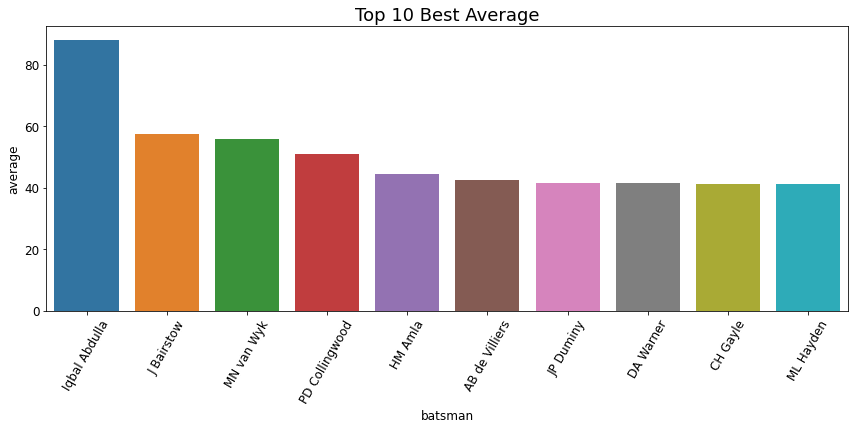

In [37]:
plt.tight_layout()
plt.title("Top 10 Best Average", size=18)
plt.xticks(rotation=60)
plt.tight_layout()
sns.barplot(x='batsman',
            y="average", 
            data=top_10_best_avg);

In [38]:
# Top 10 batsman having best strike rate
top_10_best_strk_rt  = most_runs_average_df.nlargest(10,['strikerate'])
top_10_best_strk_rt = pd.DataFrame(top_10_best_strk_rt)
top_10_best_strk_rt[['batsman','strikerate']]

,batsman,strikerate
315,Umar Gul,205.263158
452,VRV Singh,200.000000
63,AD Russell,188.164894
287,LJ Wright,176.666667
213,Shahid Afridi,176.086957
161,K Gowtham,174.698795
288,S Curran,172.727273
300,SN Thakur,171.428571
365,ER Dwivedi,171.428571
68,SP Narine,171.397380


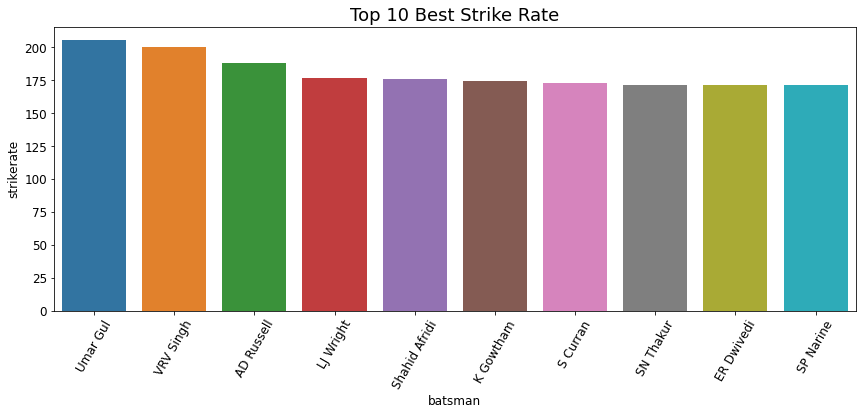

In [39]:
plt.tight_layout()
# plt.xlabel("Batsman", size=14)
# plt.ylabel("Strike Rate", size=14)
plt.title("Top 10 Best Strike Rate", size=18)
plt.xticks(rotation=60)
plt.tight_layout()
sns.barplot(x='batsman',
            y="strikerate", 
            data=top_10_best_strk_rt);

In [40]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

**3) Most Scoring Team and Economiest Team across all the season till 2019 (IPL Final)**

In [41]:
most_scoring_team = deliveries_df.groupby('batting_team')['total_runs'].sum()
most_scoring_team = pd.DataFrame(most_scoring_team)
most_scoring_team = most_scoring_team.nlargest(20,["total_runs"])
most_scoring_team = most_scoring_team.reset_index(level='batting_team', col_level=1)
most_scoring_team

,batting_team,total_runs
0,Rising Pune Supergiants,1941.0
1,Sunrisers Hyderabad,1923.0
2,Mumbai Indians,1884.0
3,Gujarat Lions,1871.0
4,Kolkata Knight Riders,1853.0
5,Delhi Capitals,1640.0
6,Kings XI Punjab,1548.0
7,Royal Challengers Bangalore,1526.0


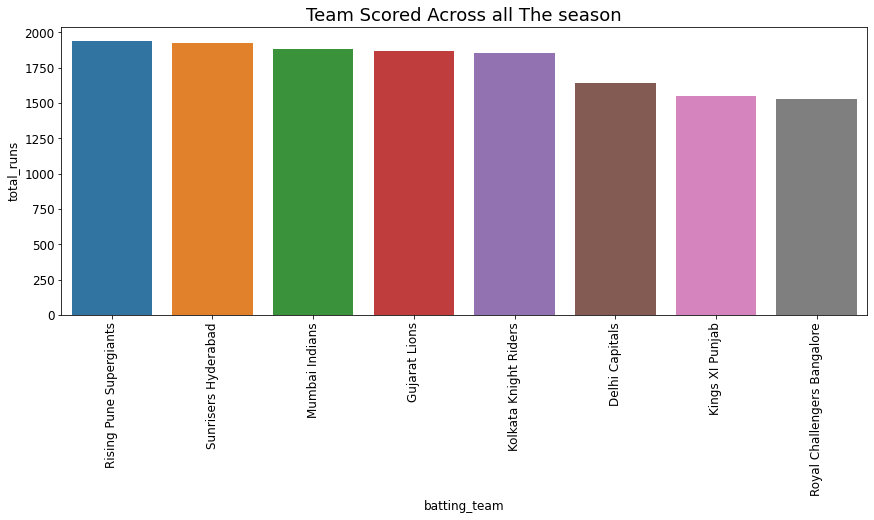

In [42]:
plt.title("Team Scored Across all The season", size=18)
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='batting_team',
            y="total_runs", 
            data=most_scoring_team);

In [43]:
score_against = deliveries_df.groupby('bowling_team')['total_runs'].sum()
score_against = pd.DataFrame(score_against)
score_against = score_against.nsmallest(20,["total_runs"])
score_against = score_against.reset_index(level='bowling_team', col_level=1)
score_against

,bowling_team,total_runs
0,Mumbai,0.0
1,Kings XI Punjab,1583.0
2,Mumbai Indians,1651.0
3,Royal Challengers Bangalore,1723.0
4,Delhi Capitals,1738.0
5,Kolkata Knight Riders,1802.0
6,Sunrisers Hyderabad,1826.0
7,Rising Pune Supergiants,1924.0
8,Gujarat Lions,1939.0


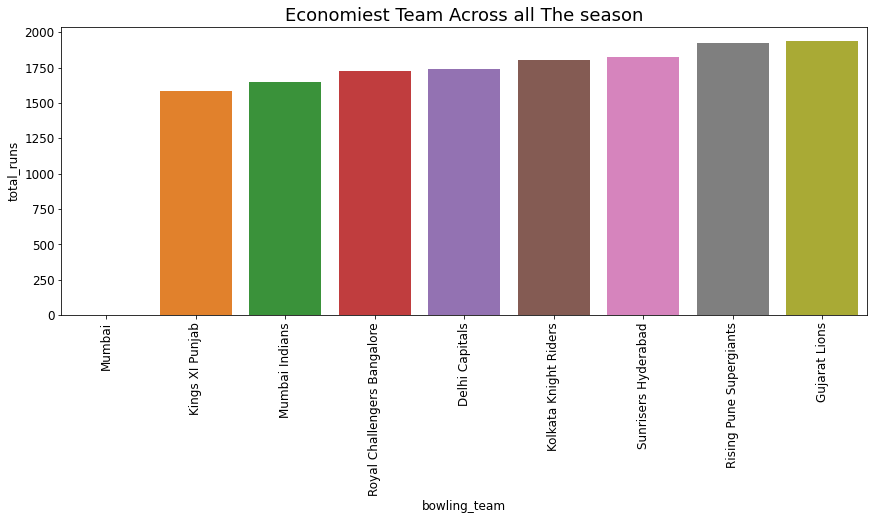

In [44]:
plt.title("Economiest Team Across all The season", size=18)
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='bowling_team',
            y="total_runs", 
            data=score_against);

In [45]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

**4) Most successful Player (Based on Man Of the Match count)**

In [46]:
mom_cnt =  matches_df.groupby('player_of_match')[['id']].count()
mom_cnt = pd.DataFrame(mom_cnt)
mom_cnt = mom_cnt.rename(columns={'id':'pom_count'})
mom_cnt = mom_cnt.reset_index(level='player_of_match', col_level=1)
mom_cnt = mom_cnt.nlargest(10,['pom_count'])
mom_cnt 

,player_of_match,pom_count
35,CH Gayle,21
10,AB de Villiers,20
42,DA Warner,17
137,MS Dhoni,17
167,RG Sharma,17
222,YK Pathan,16
201,SR Watson,15
191,SK Raina,14
56,G Gambhir,13
18,AM Rahane,12


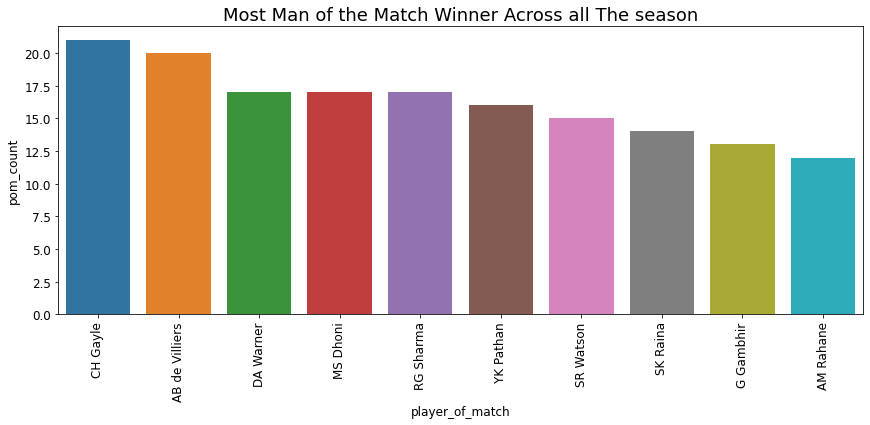

In [47]:
plt.title("Most Man of the Match Winner Across all The season", size=18)
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='player_of_match',
            y="pom_count", 
            data=mom_cnt);

In [48]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

**5) How many players represent their country? Country wise player distribution.**

In [49]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Name    566 non-null    object
 1   DOB            471 non-null    object
 2   Batting_Hand   566 non-null    object
 3   Bowling_Skill  502 non-null    object
 4   Country        566 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB


In [50]:
players_df[['Country','Player_Name']]

,Country,Player_Name
0,India,A Ashish Reddy
1,India,A Chandila
2,India,A Chopra
3,India,A Choudhary
4,Sri Lanka,A Dananjaya
...,...,...
561,Pakistan,Younis Khan
562,India,YS Chahal
563,India,Yuvraj Singh
564,India,YV Takawale


In [51]:
players_df.groupby('Country')[['Player_Name']].count()

,Player_Name
Country,
Afghanistan,3
Australia,77
Bangladesh,5
England,30
India,313
Netherlands,1
New Zealand,28
Pakistan,13
South Africa,45


In [52]:
countrywise_plr_cnt_df = players_df.groupby('Country')[['Player_Name']].count()
countrywise_plr_cnt_df = countrywise_plr_cnt_df.rename(columns = {'Country':'Country', "Player_Name": "Count"})
countrywise_plr_cnt_df = countrywise_plr_cnt_df.nlargest(20,['Count'])
countrywise_plr_cnt_df

,Count
Country,
India,313
Australia,77
South Africa,45
England,30
New Zealand,28
West Indies,28
Sri Lanka,21
Pakistan,13
Bangladesh,5


In [53]:
countrywise_plr_cnt_df = countrywise_plr_cnt_df.reset_index(level='Country', col_level=1)
countrywise_plr_cnt_df

,Country,Count
0,India,313
1,Australia,77
2,South Africa,45
3,England,30
4,New Zealand,28
5,West Indies,28
6,Sri Lanka,21
7,Pakistan,13
8,Bangladesh,5
9,Afghanistan,3


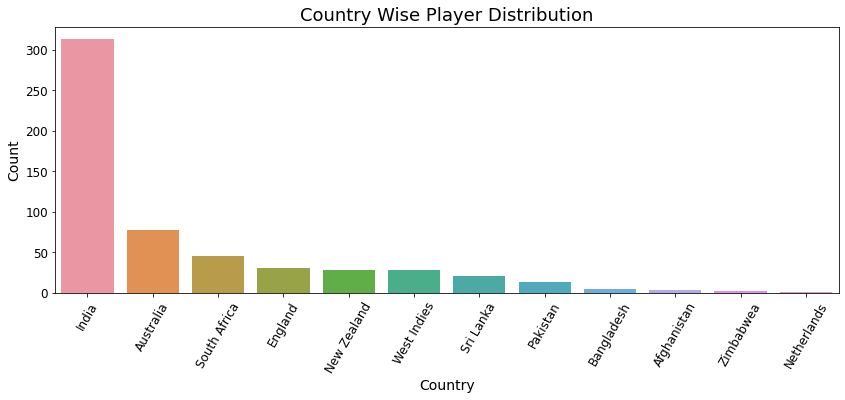

In [54]:
countrywise_plr_cnt_df = pd.DataFrame(countrywise_plr_cnt_df)
plt.tight_layout()
plt.xlabel("Country", size=14)
plt.ylabel("Number of Players", size=14)
plt.title("Country Wise Player Distribution", size=18)
plt.xticks(rotation=60)
plt.tight_layout()
sns.barplot(x='Country',
            y="Count", 
            data=countrywise_plr_cnt_df);

**As per the graph (analysis) Australian players are the first choice among the international players.**

In [55]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

**6) Top 10 Busiest (Popular)  IPL City / venue.**

In [56]:
Venue_count = matches_df.groupby('city')[['venue']].count()
Venue_count = pd.DataFrame(Venue_count)
# Venue_count = Venue_count.set_index('venue')
Venue_count = Venue_count.nlargest(10,["venue"])
Venue_count = Venue_count.rename(columns ={'venue': 'Match_Count'}, inplace = False)
Venue_count = Venue_count.reset_index(level='city', col_level=1)
Venue_count

,city,Match_Count
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


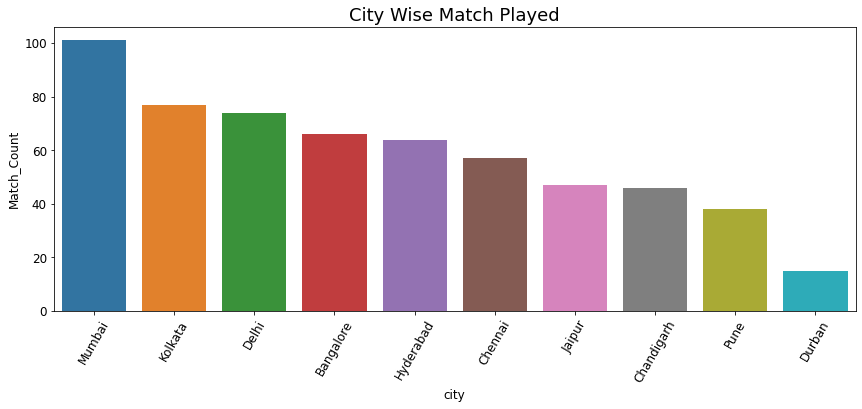

In [57]:
plt.tight_layout()
plt.title("City Wise Match Played", size=18)
plt.xticks(rotation=60)
plt.tight_layout()
sns.barplot(x='city',
            y="Match_Count", 
            data=Venue_count);

**7) No. of wins of each team throughout different seasons**

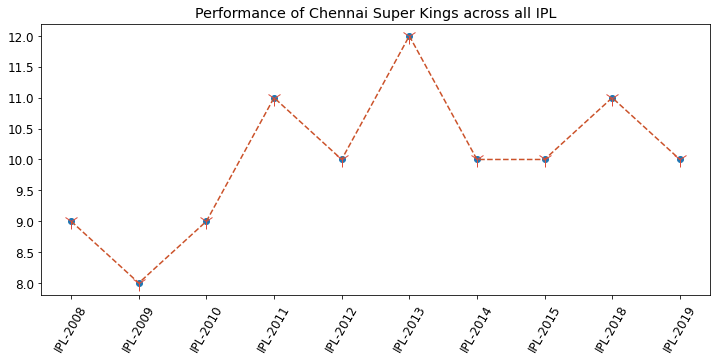

In [58]:
Chennai_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Chennai_Perf=pd.DataFrame(Chennai_Perf)
Chennai_Perf.rename(columns={0:'wins'},inplace=True)
Chennai_Perf.reset_index(inplace=True)
Chennai=Chennai_Perf[Chennai_Perf['winner']=='Chennai Super Kings']
plt.xticks(rotation=60)
plt.title('Performance of Chennai Super Kings across all IPL')
plt.scatter('Season','wins',data=Chennai)
plt.plot('Season','wins',data=Chennai,color='#cb522a',marker='1',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

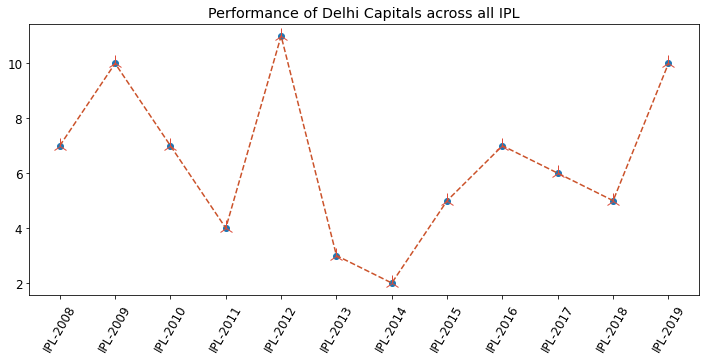

In [59]:
Delhi_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Delhi_Perf =pd.DataFrame(Delhi_Perf)
Delhi_Perf.rename(columns={0:'wins'},inplace=True)
Delhi_Perf.reset_index(inplace=True)
Delhi=Delhi_Perf[Delhi_Perf['winner']=='Delhi Capitals']
plt.xticks(rotation=60)
plt.title('Performance of Delhi Capitals across all IPL')
plt.scatter('Season','wins',data=Delhi)
plt.plot('Season','wins',data=Delhi,color='#cb522a',marker='2',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

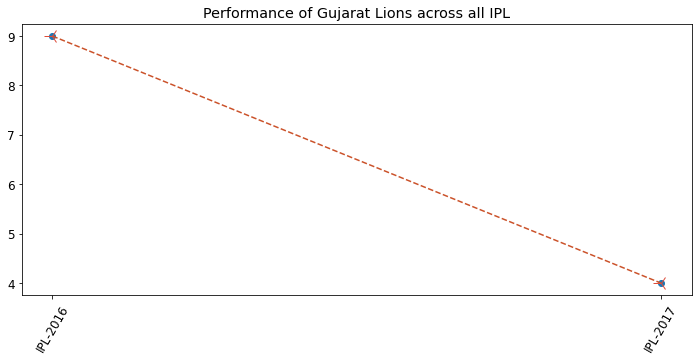

In [60]:
Gujarat_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Gujarat_Perf =pd.DataFrame(Gujarat_Perf)
Gujarat_Perf.rename(columns={0:'wins'},inplace=True)
Gujarat_Perf.reset_index(inplace=True)
Gujarat=Gujarat_Perf[Gujarat_Perf['winner']=='Gujarat Lions']
plt.xticks(rotation=60)
plt.title('Performance of Gujarat Lions across all IPL')
plt.scatter('Season','wins',data=Gujarat)
plt.plot('Season','wins',data=Gujarat,color='#cb522a',marker='3',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

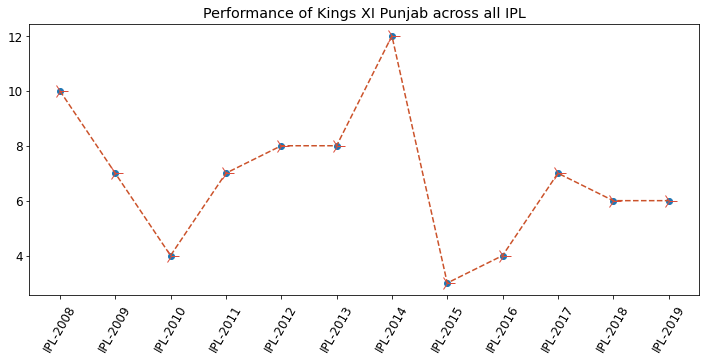

In [61]:
Kings_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Kings_Perf =pd.DataFrame(Gujarat_Perf)
Kings_Perf.rename(columns={0:'wins'},inplace=True)
Kings_Perf.reset_index(inplace=True)
Kings=Kings_Perf[Kings_Perf['winner']=='Kings XI Punjab']
plt.xticks(rotation=60)
plt.title('Performance of Kings XI Punjab across all IPL')
plt.scatter('Season','wins',data=Kings)
plt.plot('Season','wins',data=Kings,color='#cb522a',marker='4',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

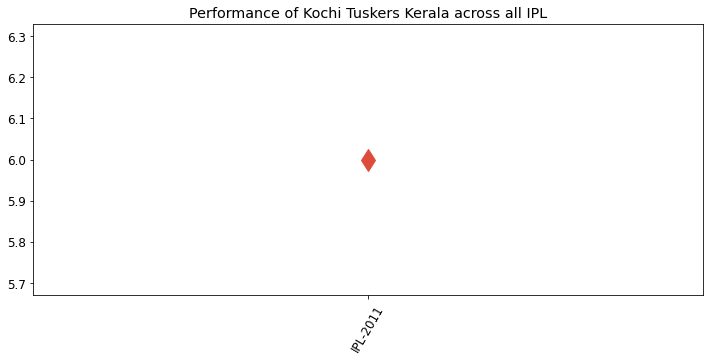

In [62]:
Kerala_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Kerala_Perf =pd.DataFrame(Kerala_Perf)
Kerala_Perf.rename(columns={0:'wins'},inplace=True)
Kerala_Perf.reset_index(inplace=True)
Kerala=Kerala_Perf[Kerala_Perf['winner']=='Kochi Tuskers Kerala']
plt.xticks(rotation=60)
plt.title('Performance of Kochi Tuskers Kerala across all IPL')
plt.scatter('Season','wins',data=Kerala)
plt.plot('Season','wins',data=Kerala,color='#cb522a',marker='d',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

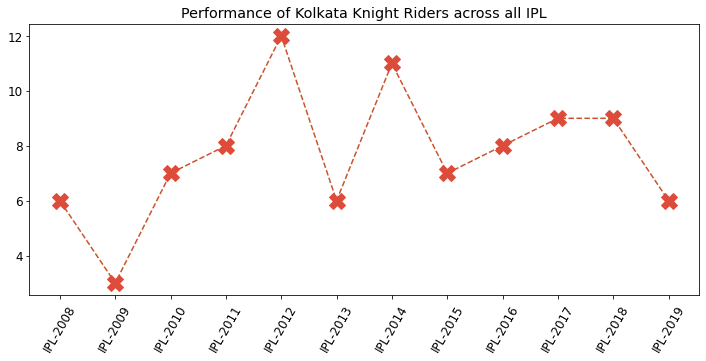

In [63]:
Kolkata_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Kolkata_Perf =pd.DataFrame(Kolkata_Perf)
Kolkata_Perf.rename(columns={0:'wins'},inplace=True)
Kolkata_Perf.reset_index(inplace=True)
Kolkata=Kolkata_Perf[Kolkata_Perf['winner']=='Kolkata Knight Riders']
plt.xticks(rotation=60)
plt.title('Performance of Kolkata Knight Riders across all IPL')
plt.scatter('Season','wins',data=Kolkata)
plt.plot('Season','wins',data=Kolkata,color='#cb522a',marker='X',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

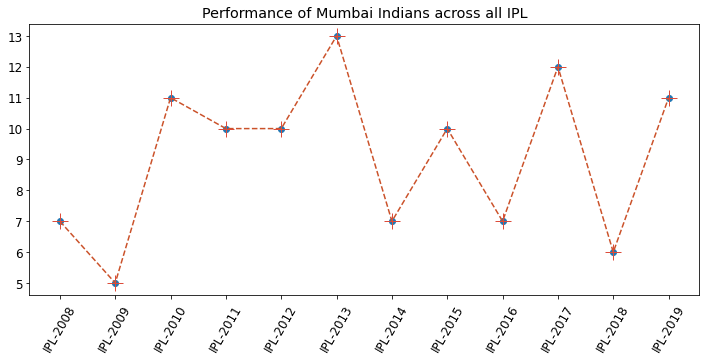

In [64]:
Mumbai_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Mumbai_Perf =pd.DataFrame(Mumbai_Perf)
Mumbai_Perf.rename(columns={0:'wins'},inplace=True)
Mumbai_Perf.reset_index(inplace=True)
Mumbai=Mumbai_Perf[Mumbai_Perf['winner']=='Mumbai Indians']
plt.xticks(rotation=60)
plt.title('Performance of Mumbai Indians across all IPL')
plt.scatter('Season','wins',data=Mumbai)
plt.plot('Season','wins',data=Mumbai ,color='#cb522a',marker='+',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

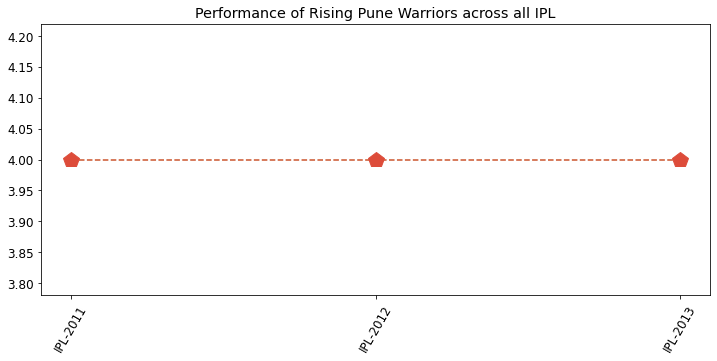

In [65]:
Pune_warrior_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Pune_warrior_Perf = pd.DataFrame(Pune_warrior_Perf)
Pune_warrior_Perf.rename(columns={0:'wins'},inplace=True)
Pune_warrior_Perf.reset_index(inplace=True)
Pune_warrior=Pune_warrior_Perf[Pune_warrior_Perf['winner']=='Pune Warriors']
plt.xticks(rotation=60)
plt.title('Performance of Rising Pune Warriors across all IPL')
plt.scatter('Season','wins',data=Pune_warrior)
plt.plot('Season','wins',data=Pune_warrior,color='#cb522a',marker='p',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

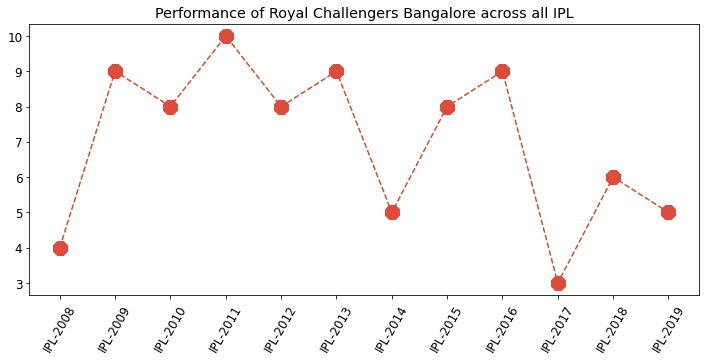

In [66]:
Bangalore_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Bangalore_Perf =pd.DataFrame(Bangalore_Perf)
Bangalore_Perf.rename(columns={0:'wins'},inplace=True)
Bangalore_Perf.reset_index(inplace=True)
Bangalore=Bangalore_Perf[Bangalore_Perf['winner']=='Royal Challengers Bangalore']
plt.xticks(rotation=60)
plt.title('Performance of Royal Challengers Bangalore across all IPL')
plt.scatter('Season','wins',data=Bangalore)
plt.plot('Season','wins',data=Bangalore,color='#cb522a',marker='8',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

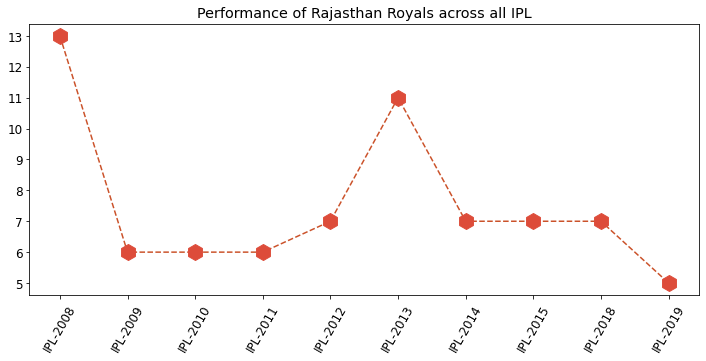

In [67]:
Rajasthan_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Rajasthan_Perf =pd.DataFrame(Rajasthan_Perf)
Rajasthan_Perf.rename(columns={0:'wins'},inplace=True)
Rajasthan_Perf.reset_index(inplace=True)
Rajasthan=Rajasthan_Perf[Rajasthan_Perf['winner']=='Rajasthan Royals']
plt.xticks(rotation=60)
plt.title('Performance of Rajasthan Royals across all IPL')
plt.scatter('Season','wins',data=Rajasthan)
plt.plot('Season','wins',data=Rajasthan,color='#cb522a',marker='h',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

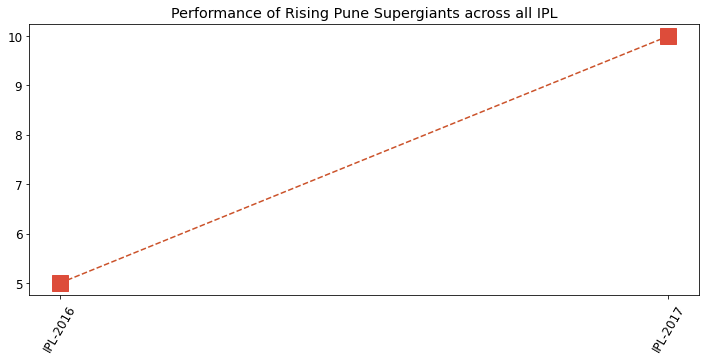

In [68]:
Pune_gaints_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Pune_gaints_Perf =pd.DataFrame(Pune_gaints_Perf)
Pune_gaints_Perf.rename(columns={0:'wins'},inplace=True)
Pune_gaints_Perf.reset_index(inplace=True)
Pune_gaints=Pune_gaints_Perf[Pune_gaints_Perf['winner']=='Rising Pune Supergiants']
plt.xticks(rotation=60)
plt.title('Performance of Rising Pune Supergiants across all IPL')
plt.scatter('Season','wins',data=Pune_gaints)
plt.plot('Season','wins',data=Pune_gaints,color='#cb522a',marker='s',linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

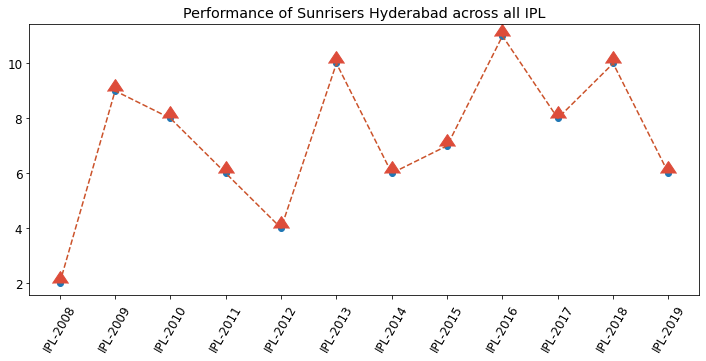

In [69]:
Hyderabad_Perf = matches_df.pivot_table(index = ['winner','Season'], aggfunc = 'size')
Hyderabad_Perf =pd.DataFrame(Hyderabad_Perf)
Hyderabad_Perf.rename(columns={0:'wins'},inplace=True)
Hyderabad_Perf.reset_index(inplace=True)
Hyderabad=Hyderabad_Perf[Hyderabad_Perf['winner']=='Sunrisers Hyderabad']
plt.xticks(rotation=60)
plt.title('Performance of Sunrisers Hyderabad across all IPL')
plt.scatter('Season','wins',data=Hyderabad)
plt.plot('Season','wins',data=Hyderabad,color='#cb522a',marker=10,linestyle='--',ms=16,mfc='#dd4c3a',mec='#dd4c3a');

## Inferences and Conclusion

I have analysed this IPL data in very simple form. I have drawn some simple graphs for comparing team and individual performance and popular city/venue. Using this IPL data I can conclude on the following Result: 

- **Right Handed batsman is Dominating the IPL more than Left Handed batsman.**

- **Virat Kohli is the leading scorer among all the batsman**

- **Iqbal Abdulla has the best average among all the players**

- **Umar Gul has the best strike rate among all the players**

- **Mumbai Indians is top scorer among all the team across all the season.**

- **Most economic Team is  Rajasthan Royals means against RR it is very difficult to score against them**

- **Chris Gayle is the top performer among all the season with highest Man of the Match Award.** 

- **Australian is the 1st choice among all International Players.**

- **Mumbai is the most popular venue among all the venue.** 


Finally, let's save and commit our work

In [70]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'

## References and Future Work

Data set downloaded from - https://www.kaggle.com/ramjidoolla/ipl-data-set

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

External Reference Cricket related: 

- https://www.iplt20.com/

- https://www.espncricinfo.com/

I have choosen this data for analysing the individual performance, Team performance and some other interesting facts as well. I explore many thing but still many areas are pending which need to be explore more deeply and then we can answer some more and more interesting question like this: 

- **Winning impact on Toss winner (is Toss winner has higher chance of winning?)**

- **Most successful Team (Win Count and Win%)**

- **Best Team at Home ground and at opponent's Ground.**

- **Which Team is having the highest average batting Score.**

In [71]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis


'https://jovian.ml/santosh0236/indian-premier-league-stats-and-analysis'